In [131]:
#Importig required Libraries for Diabetes Prediction 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [104]:
#Now, loading the dataset from the folder.

dataset_diabetes = pd.read_csv('diabetes.csv')

In [105]:
#Printing the first 5 rows and checking the dataset 

dataset_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result,Alcoholic
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0


In [106]:
#Measuring the length of the dataset by getting the numbers of rows and Columns

dataset_diabetes.shape

(768, 10)

In [107]:
#Measuring the statistical data of the dataset.

dataset_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result,Alcoholic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.325521
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.468874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


In [108]:
dataset_diabetes['Result'].value_counts()

0    500
1    268
Name: Result, dtype: int64

In [109]:
# Here in the above we can see that the dataset represent 
#0 as Non-Diabetic
#1 as Diabetic

In [110]:
#Grouping the dataset as Diabetic and Non-Diabetic as per result.
dataset_diabetes.groupby('Result').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Alcoholic
Result,,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.070000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,0.802239


In [111]:
#Seperating the data and labels 
X = dataset_diabetes.drop(columns = 'Result', axis=1)
Y = dataset_diabetes['Result']

In [112]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Alcoholic  
0                       0.627   50          0  
1              

In [113]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Result, Length: 768, dtype: int64


In [114]:
#Data Standardization 

In [115]:
scaler = StandardScaler()

In [116]:
scaler.fit(X)

StandardScaler()

In [117]:
standardized_data = scaler.transform (X)

In [118]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
  -0.69471252]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.69471252]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.43944434]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.69471252]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.43944434]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.69471252]]


In [119]:
X = standardized_data
Y = dataset_diabetes['Result']

In [120]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
  -0.69471252]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.69471252]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.43944434]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.69471252]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.43944434]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.69471252]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Result, Length: 768, dtype: int64


In [121]:
#Train Test Split

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [123]:
print(X.shape, X_train.shape, X_test.shape)

(768, 9) (614, 9) (154, 9)


In [124]:
#Training the Model
classifier = svm.SVC(kernel='linear')

In [125]:

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [126]:
#Accuracy Score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [127]:
print('Accuracy Score of the training data is:',training_data_accuracy)

Accuracy Score of the training data is: 0.8876221498371335


In [128]:
#Accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [129]:
print('Accuracy Score of the test data is', test_data_accuracy)

Accuracy Score of the test data is 0.8766233766233766


Text(0.5, 1.0, 'Pairplot of Variables by Result')

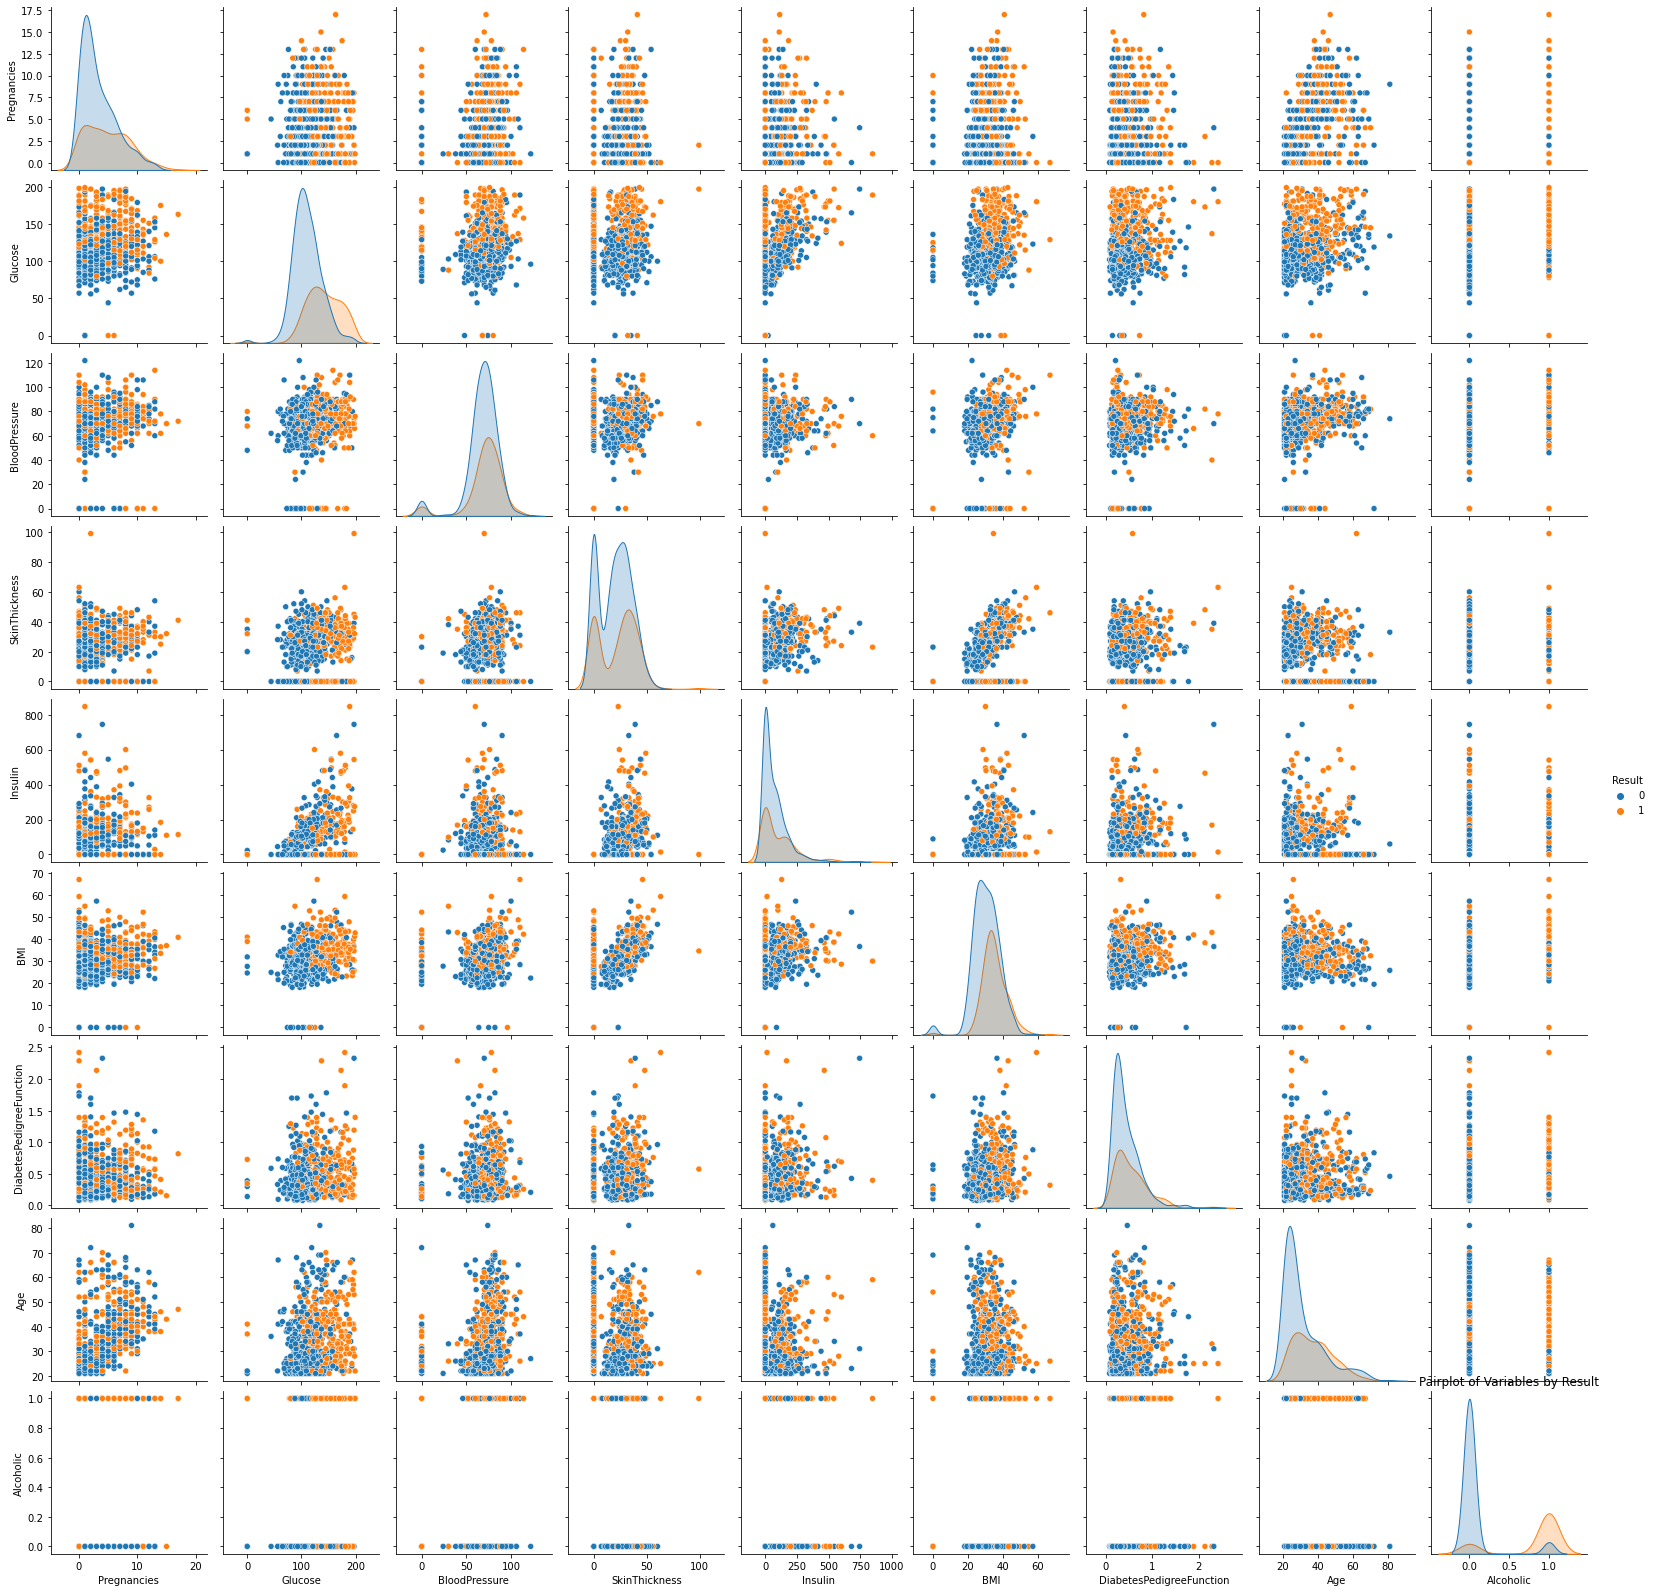

In [134]:
#Visualizing the dataset column with Seaborn

sns.pairplot(dataset_diabetes, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age", "Alcoholic"],hue="Result")
plt.title("Pairplot of Variables by Result")

In [133]:
#Making a Prediction System:

input_data = (5,166,72,19,175,25.8,0.587,51,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316 -0.69471252]]
[0]
The person is not diabetic


C:\Users\jaysw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
